## Focus on Mesenchymal cells

In [1]:
# Import useful modules

import numpy as np
import pandas as pd
import scanpy as sc
import os
#import igraph
import matplotlib.pyplot as plt
import seaborn

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=90)

scanpy==1.4+39.gc70f24b anndata==0.6.18 numpy==1.16.2 scipy==1.2.1 pandas==0.24.1 scikit-learn==0.20.3 statsmodels==0.9.0 python-igraph==0.7.1 


In [2]:
# Load the integrated and annotated dataset
adata_ann = sc.read_h5ad('/Data/Annotated_dataset_v1.h5ad')

# Load non-integrated & pre-processed dataset
adata_raw = sc.read_h5ad('/Data/PreProcessed_preliminary_dataset.h5ad')

In [3]:
# Transfer annotation onto a non-data integrated anndata object.
adata = adata_raw[adata_ann.obs.index.tolist(), ]
adata.obs['cell_type'] = adata_ann.obs['cell_type']

In [4]:
resident_cell_bool = []

for x in adata.obs['cell_type']:
    resident_cell_bool = resident_cell_bool + [x in ['Endothelial', 'Fibroblast', 'Smooth muscle']]

In [5]:
list_of_cell_names = adata.obs.loc[resident_cell_bool, :].index.tolist()
adata = adata[list_of_cell_names, ]
adata.shape

(3629, 18417)

In [6]:
sc.tl.pca(adata, svd_solver='arpack')

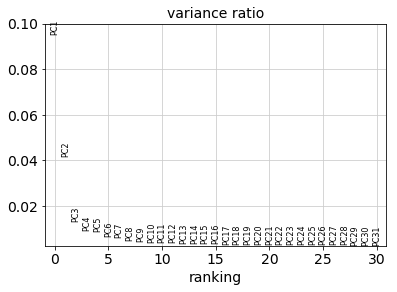

In [7]:
sc.pl.pca_variance_ratio(adata, log = False)

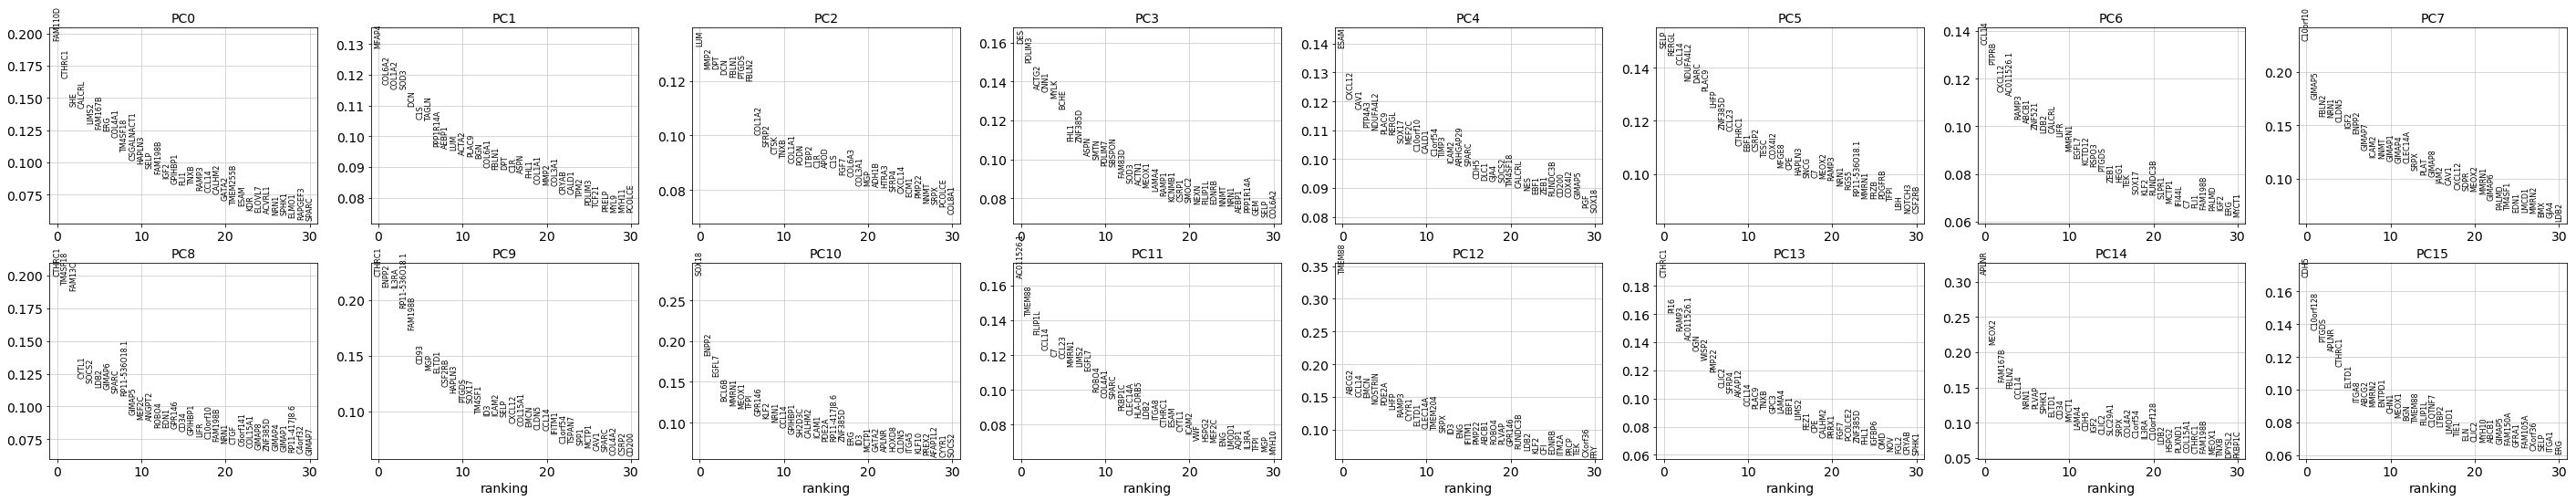

In [8]:
sc.pl.pca_loadings(adata, components=list(range(0,16)))

### Embedding

In [9]:
sc.pp.neighbors(adata, n_neighbors=50, n_pcs=5)

computing neighbors
    using 'X_pca' with n_pcs = 5
    finished (0:00:04.06) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix


In [10]:
sc.tl.umap(adata)

computing UMAP
    finished (0:00:13.31) --> added
    'X_umap', UMAP coordinates (adata.obsm)


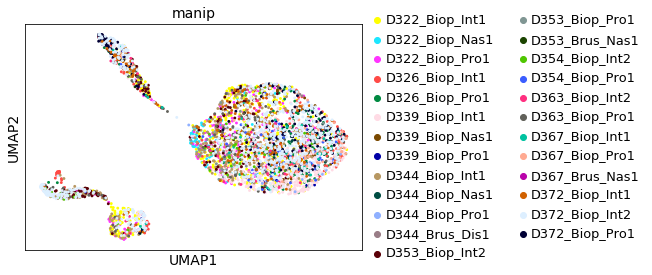

In [11]:
sc.pl.umap(adata, color=['manip'], edges = False)

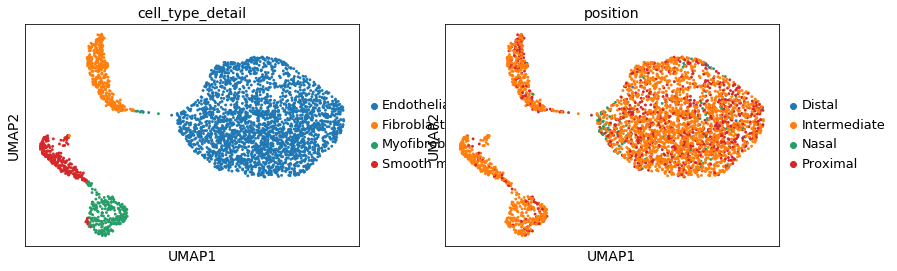

In [3]:
sc.pl.umap(adata, color=['cell_type_detail', 'position'], edges = False)

In [12]:
communities, graph, Q = sc.external.tl.phenograph(adata.obsm['X_pca'][:,0:3], k=100)

PhenoGraph clustering
Finding 100 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.11219525337219238 seconds
Jaccard graph constructed in 3.0386462211608887 seconds
Wrote graph to binary file in 1.1436378955841064 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.799206
Louvain completed 21 runs in 8.932716608047485 seconds
PhenoGraph complete in 13.274150371551514 seconds
    finished (0:00:13.36)


In [13]:
adata.obs['phenograph'] = pd.Categorical(communities)

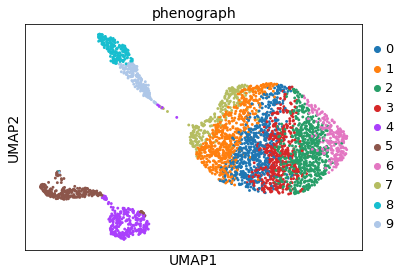

In [14]:
sc.pl.umap(adata, color=['phenograph'])

In [15]:
new_cluster_names = {
    '0':'Endothelial', '1':'Endothelial', '2':'Endothelial', '3':'Endothelial', '4':'Smooth muscle', # 0-4
    '5':'Myofibroblast','6':'Endothelial', '7':'Endothelial', '8':'Fibroblast', '9':'Fibroblast'
                    }


In [16]:
vect = []
for i in range(0, len(adata.obs['phenograph'])):
    vect = vect + [new_cluster_names[str(adata.obs['phenograph'][i])]]
    
adata.obs['cell_type_detail'] = vect

... storing 'cell_type_detail' as categorical


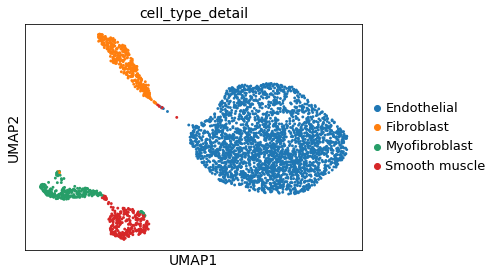

In [17]:
sc.pl.umap(adata, color=['cell_type_detail'])

In [6]:
adata.obs['umap_1'] = pd.DataFrame(adata.obsm['X_umap']).iloc[:,0].tolist()
adata.obs['umap_2'] = pd.DataFrame(adata.obsm['X_umap']).iloc[:,1].tolist()
adata.obs.to_csv(path_or_buf = '/Data/Focus_mesenchymal_cells_metadata.tsv', 
               sep = '\t', index = True)

In [70]:
adata.write('/Data/Focus_mesenchymal_cells.h5ad')

***
### Trying to figure out the actual cell type behind the temporary annotation Myofibroblast.

In [19]:
sc.tl.rank_genes_groups(adata, groupby = 'cell_type_detail', groups = ['Smooth muscle', 'Myofibroblast'], method='wilcoxon')

ranking genes
    finished (0:00:07.98) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids


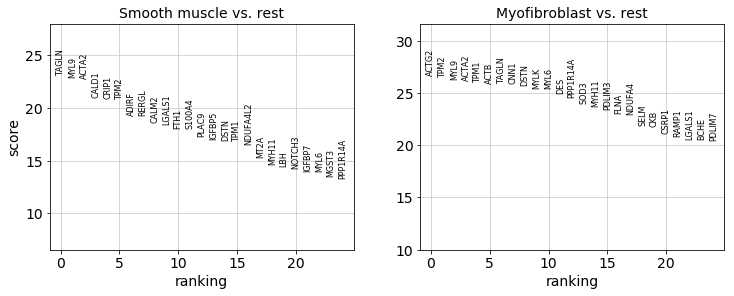

In [20]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

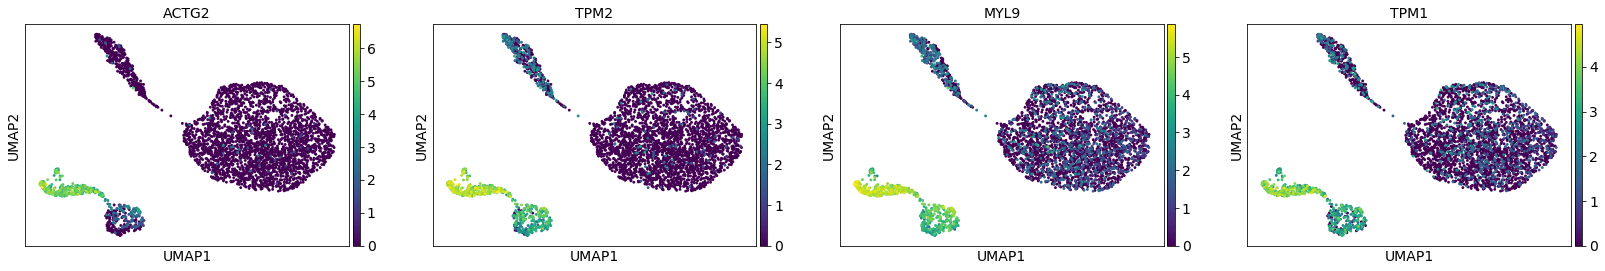

In [27]:
sc.pl.umap(adata, color=['ACTG2', 'TPM2', 'MYL9', 'TPM1'])

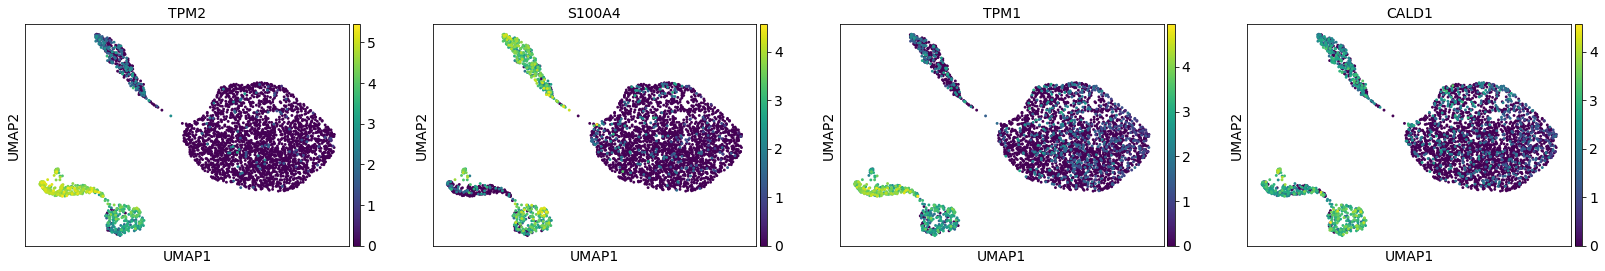

In [22]:
sc.pl.umap(adata, color=['TPM2', 'S100A4', 'TPM1', 'CALD1'])

In [23]:
sc.tl.rank_genes_groups(adata, groupby = 'cell_type_detail', groups = ['Smooth muscle', 'Myofibroblast', 'Fibroblast'], method='wilcoxon')

ranking genes
    finished (0:00:08.28) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids


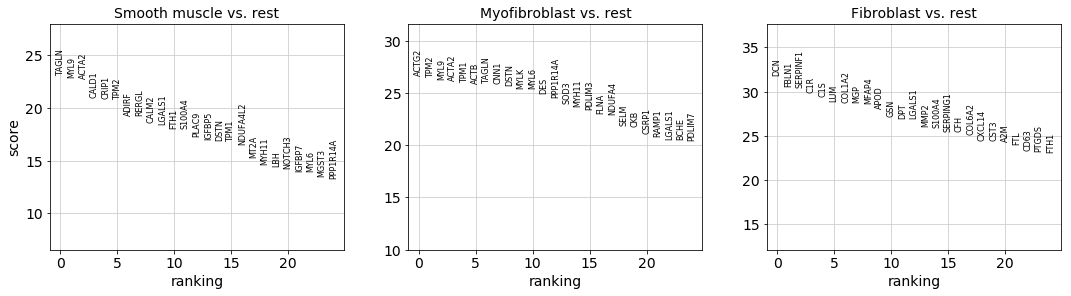

In [24]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [25]:
sc.tl.rank_genes_groups(adata, groupby = 'cell_type_detail', method='wilcoxon')

ranking genes
    finished (0:00:09.62) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids


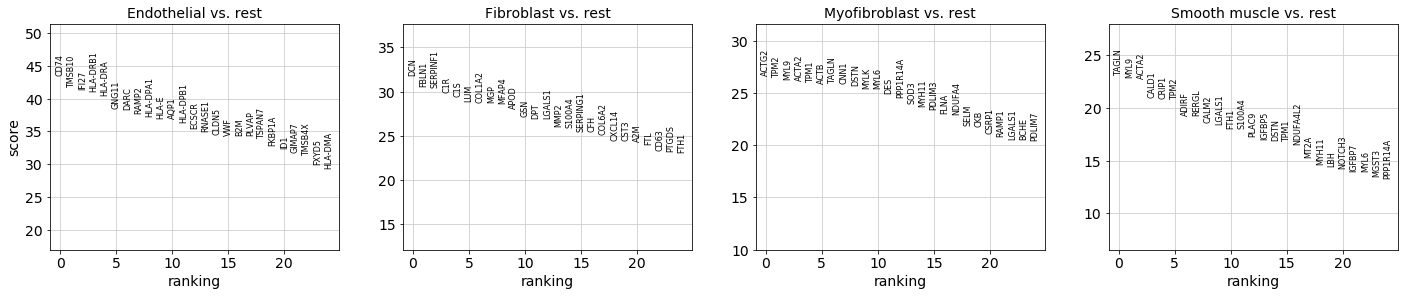

In [26]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)